# Rad 116ers - Assignment 01: Data Preprocessing Project
Pre-requisites and libraries used:
Python 3<br>
pandas<br>
matplotlib<br>
numpy<br>
Jupyter Notebook

## Member Assignments
### Fernando Mendez:
Dropping columns<br>
Missing Values<br>
Outliers<br>
Duplicates/Dropping Fields<br>
Mean and Standard Deviation<br>
Principle Components Analysis

### Ethan Tecson:
Create a dataframe<br>
Shuffling a dataframe<br>
Sorting a dataframe<br>
Saving a dataframe

### Joshua Langley:
Feature Normalization<br>
Calculated Fields

### Calvin Chen:
Aggregation<br>
Sampling

### Seungjin Chae:
Concatenating<br>

### Daniel Chu:
Discretization<br>

### Ryan Sario:
Training/Test Split

### Sukhdeep Banwait:
Tutorial



# Dropping a Column
The column 'Site' is the same for all the data in the dataset, hence, it will be dropped for a better reading of the data. 

In [1]:
import pandas as pd

data = pd.read_csv('LaqnData.csv')

# site values are all the same, hence, they are being dropped 
# to not be accounted in the attribute count
data = data.drop(['Site'],  axis = 1)


print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.tail()

Number of instances = 175200
Number of attributes = 5


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
175195,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,O3,31/12/2018 23:30,61.1,ug m-3,R
175199,O3,31/12/2018 23:45,61.1,ug m-3,R


Most instances contain a value of 'NaN' in the column 'Value'. Hence, data.tail() was called in order to get a better representation of the data. 

# Missing Values

In [48]:
import numpy as np 
data.replace('',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))


Number of instances = 175200
Number of attributes = 6
Number of missing values:
	Site: 0
	Species: 0
	ReadingDateTime: 0
	Value: 43476
	Units: 0
	Provisional or Ratified: 0


Here we see that the attribute 'Value' is missing from 43,476 instances.\
They are then replaced with NaN (Not a Number)\
By having NaN in the missing values we use dropna() to drop any NaN values. 

In [112]:
data2 = data['Value']
print('Before replacing missing values:')

print(data2[35035:35045])

data3 = data2.dropna()
print('\nNumber of rows before discarding missing values = %d' % (data.shape[0]))
print('Number of rows after discarding missing values = %d' % (data3.shape[0]))

Before replacing missing values:
35035    NaN
35036    NaN
35037    NaN
35038    NaN
35039    NaN
35040    7.1
35041    7.1
35042    7.1
35043    7.1
35044    5.1
Name: Value, dtype: float64

Number of rows before discarding missing values = 175200
Number of rows after discarding missing values = 131724


By dropping NaN values we cause the Speices 'CO' disappears due to all of it's values containing NaN

# Outliers

To plot the data for outliers we pull up 2 rows, one with NaN values and another with a value for 'Value'.\
We want to be able to plot this data but based of the 'Species' to have a better representation of the each individual Species.\

In [113]:

data.loc[[35039,35042]]


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
35039,CO,31/12/2018 23:45,NaN,mg m-3,P
35042,NO,01/01/2018 00:30,7.1,ug m-3,R


In order to make a boxplot we have to pivot the table to differentiate the types of sepcies and plot them based of each species

Species   NO  NO2  NOX    O3
35040    7.1  NaN  NaN   NaN
35041    7.1  NaN  NaN   NaN
35042    7.1  NaN  NaN   NaN
35043    7.1  NaN  NaN   NaN
35044    5.1  NaN  NaN   NaN
...      ...  ...  ...   ...
175195   NaN  NaN  NaN  57.0
175196   NaN  NaN  NaN  61.1
175197   NaN  NaN  NaN  61.1
175198   NaN  NaN  NaN  61.1
175199   NaN  NaN  NaN  61.1

[131724 rows x 4 columns]
Species            NO           NO2           NOX            O3
count    32456.000000  32448.000000  32448.000000  34372.000000
mean        27.235408     46.444181     88.212722     31.307599
std         38.191522     29.211803     81.162884     25.761797
min          0.000000      0.700000      3.700000      0.500000
25%          3.100000     21.800000     27.600000      8.900000
50%         12.500000     42.500000     65.550000     27.200000
75%         35.200000     66.300000    123.200000     47.400000
max        347.899990    165.700000    643.900020    153.800000


<Axes: >

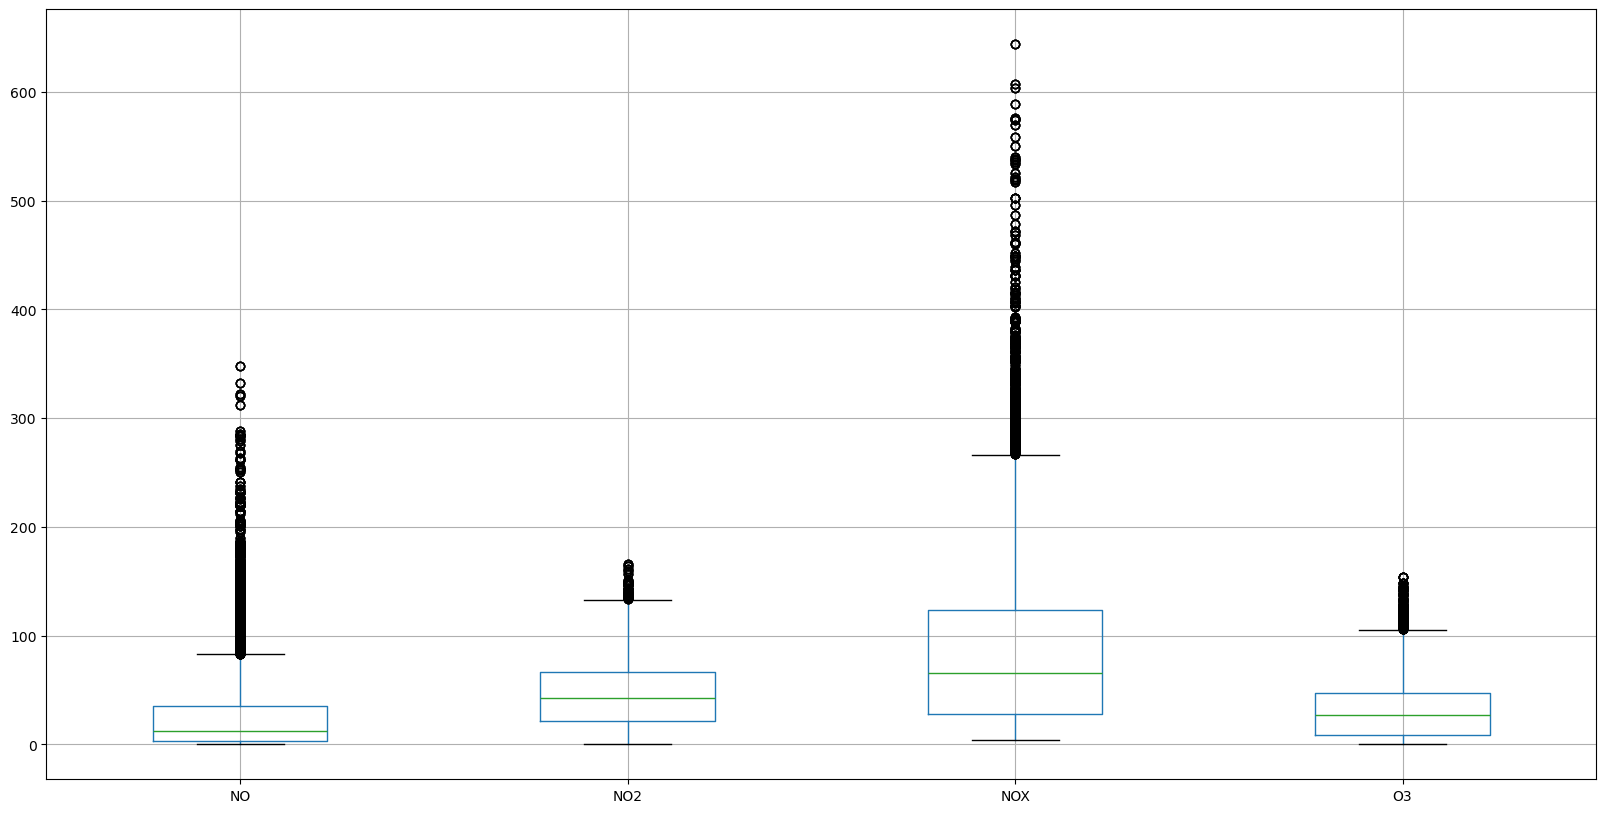

In [142]:
%matplotlib inline
data4 = data.pivot_table(values='Value', index=data.index, columns='Species', aggfunc='first')
data4['NO'] = pd.to_numeric(data4['NO'])

print(data4)
print(data4.describe())

data4.boxplot(figsize=(20,10))

Based of these boxplots we can cleary that each Species contains several outliers. 

In [116]:
Z = (data4-data4.mean())/data4.std()
print(Z)
#print(Z.describe())
Z.to_csv('z.csv', index=False)

Species        NO  NO2  NOX        O3
35040   -0.527222  NaN  NaN       NaN
35041   -0.527222  NaN  NaN       NaN
35042   -0.527222  NaN  NaN       NaN
35043   -0.527222  NaN  NaN       NaN
35044   -0.579590  NaN  NaN       NaN
...           ...  ...  ...       ...
175195        NaN  NaN  NaN  0.997306
175196        NaN  NaN  NaN  1.156457
175197        NaN  NaN  NaN  1.156457
175198        NaN  NaN  NaN  1.156457
175199        NaN  NaN  NaN  1.156457

[131724 rows x 4 columns]


Using the describe function to see the values of Z we can tell that our values are too low.\
This will discard every datapoint we have when using a Z score between -3 and 3

In [141]:
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
    
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4),:]
print('Number of rows after discarding missing vlaues = %d' % (Z2.shape[0]))


print('\nLenght before removing outliers in NO: {}'.format(len(data4)))
remove_outliers(data4, 'NO', 2)
print('Length after removing outliers in NO : {}'.format(len(data4)))


Number of rows before discarding outliers = 131724
Number of rows after discarding missing vlaues = 0

Lenght before removing outliers in NO: 112236
Length after removing outliers in NO : 111740


The spread of the data had values that were too small to fit between Z scores of -3 and 3.\
I resorted to removing outliers in the column of 'NO'.\
Using the function 'remove_outliers' for tensorflow/Tutorial, I removed any outliers in column 'NO' that had a value beyond the SD


# Duplicates/Dropping Fields

In [115]:
dups = data.duplicated()
print('Number of duplicated rows = %d' % (dups.sum()))
data.loc[[45044,45045]]

Number of duplicated rows = 0


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
45044,NO,15/04/2018 05:00,53.9,ug m-3,R
45045,NO,15/04/2018 05:15,53.9,ug m-3,R


The instances in this data set seems to not have any duplicates but that is due to the time intervales. If we drop the 'ReadingDateTime' we can truely see how many duplicated instances there are. 

In [116]:
data2 = data.drop(['ReadingDateTime'], axis=1)

dups2 = data2.duplicated()
print('Number of duplicated rows: %d' % (dups2.sum()))
data2.tail()


Number of duplicated rows: 169262


,Species,Value,Units,Provisional or Ratified
175195,O3,57.0,ug m-3,R
175196,O3,61.1,ug m-3,R
175197,O3,61.1,ug m-3,R
175198,O3,61.1,ug m-3,R
175199,O3,61.1,ug m-3,R


In [117]:
print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
noDups = data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (noDups.shape[0]))


Number of rows before discarding duplicates = 175200
Number of rows after discarding duplicates = 5938


Amount of duplicated values dropped by a large of amount


# Mean and Standard Deviation

In [16]:
import pandas as pd
data = pd.read_csv('LaqnData.csv')

pivoted_data = data.pivot_table(values='Value', index=data.index, columns='Species', aggfunc='first')

data_mean = pivoted_data.mean()
data_sd = pivoted_data.std()

print('Mean of', data_mean)
print('\n')
print('Standard Deviation of', data_sd)


Mean of Species
NO     27.235408
NO2    46.444181
NOX    88.212722
O3     31.307599
dtype: float64


Standard Deviation of Species
NO     38.191522
NO2    29.211803
NOX    81.162884
O3     25.761797
dtype: float64


# Principle Components Analysis

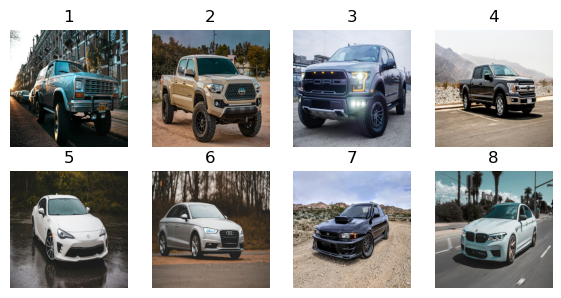

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 8
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,750000))

for i in range(1, numImages+1):
    filename = './autos/auto'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4, 4, i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
numComp = 2
pca = PCA(n_components=numComp)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))

projected['autos'] = ['truck','truck','truck','truck','car','car','car','car']
projected

,pc1,pc2,autos
1,-27081.563575,52272.951902,truck
2,-25054.558812,-8687.866439,truck
3,31132.792741,18260.111736,truck
4,61849.185521,-2346.993345,truck
5,-52376.541495,-16654.989818,car
6,-26429.640721,-18865.867821,car
7,45360.361436,-14665.320311,car
8,-7400.035094,-9312.025904,car


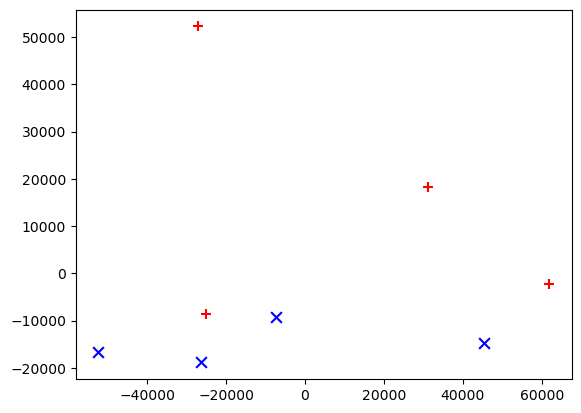

In [34]:
import matplotlib.pyplot as plt

colors = {'truck':'r', 'car':'b'}
markerTypes = {'truck':'+', 'car':'x'}

for autotype in markerTypes:
    d = projected[projected['autos']==autotype]
    plt.scatter(d['pc1'],d['pc2'], c=colors[autotype], s=60, marker=markerTypes[autotype])

Based of the Scatterplot we tell how PCA sort of differentiates trucks from the cars.\
The '+' and 'X' that are close to each other represents auto2 and auto6.\
Small similarities can be seen between auto2 and auto6. Perhaps the grill and and headlights is what got them values that are close to each other.\
\
auto2 (truck) seems to have a different color which is why it's value differes greatly from the other trucks.\
As for the cars, them seems to be spread out a bit but do maintain consistancy with their low values in pc2



# Dropping a Column
The column 'Site' is the same for all the data in the dataset, hence, it will be dropped for a better reading of the data. 

In [ ]:
import pandas as pd

data = pd.read_csv('LaqnData.csv')

# site values are all the same, hence, they are being dropped 
# to not be accounted in the attribute count
data = data.drop(['Site'],  axis = 1)


print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.tail()

Most instances contain a value of 'NaN' in the column 'Value'. Hence, data.tail() was called in order to get a better representation of the data. 

# Missing Values

In [ ]:
import numpy as np 
data.replace('',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))


Here we see that the attribute 'Value' is missing from 43,476 instances.\
They are then replaced with NaN (Not a Number)\
By having NaN in the missing values we use dropna() to drop any NaN values. 

In [ ]:
data2 = data['Value']
print('Before replacing missing values:')

print(data2[35035:35045])

data3 = data2.dropna()
print('\nNumber of rows before discarding missing values = %d' % (data.shape[0]))
print('Number of rows after discarding missing values = %d' % (data3.shape[0]))

By dropping NaN values we cause the Speices 'CO' disappears due to all of it's values containing NaN

# Outliers

To plot the data for outliers we pull up 2 rows, one with NaN values and another with a value for 'Value'.\
We want to be able to plot this data but based of the 'Species' to have a better representation of the each individual Species.\

In [ ]:

data.loc[[35039,35042]]


In order to make a boxplot we have to pivot the table to differentiate the types of sepcies and plot them based of each species

In [ ]:
%matplotlib inline
data4 = data.pivot_table(values='Value', index=data.index, columns='Species', aggfunc='first')
data4['NO'] = pd.to_numeric(data4['NO'])

print(data4)
print(data4.describe())

data4.boxplot(figsize=(20,10))

Based of these boxplots we can cleary that each Species contains several outliers. 

In [ ]:
Z = (data4-data4.mean())/data4.std()
print(Z)
#print(Z.describe())
Z.to_csv('z.csv', index=False)

Using the describe function to see the values of Z we can tell that our values are too low.\
This will discard every datapoint we have when using a Z score between -3 and 3

In [ ]:
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
    
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4),:]
print('Number of rows after discarding missing vlaues = %d' % (Z2.shape[0]))


print('\nLenght before removing outliers in NO: {}'.format(len(data4)))
remove_outliers(data4, 'NO', 2)
print('Length after removing outliers in NO : {}'.format(len(data4)))


The spread of the data had values that were too small to fit between Z scores of -3 and 3.\
I resorted to removing outliers in the column of 'NO'.\
Using the function 'remove_outliers' for tensorflow/Tutorial, I removed any outliers in column 'NO' that had a value beyond the SD


# Duplicates/Dropping Fields

In [ ]:
dups = data.duplicated()
print('Number of duplicated rows = %d' % (dups.sum()))
data.loc[[45044,45045]]

The instances in this data set seems to not have any duplicates but that is due to the time intervales. If we drop the 'ReadingDateTime' we can truely see how many duplicated instances there are. 

In [ ]:
data2 = data.drop(['ReadingDateTime'], axis=1)

dups2 = data2.duplicated()
print('Number of duplicated rows: %d' % (dups2.sum()))
data2.tail()


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
noDups = data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (noDups.shape[0]))




# Dropping a Column
The column 'Site' is the same for all the data in the dataset, hence, it will be dropped for a better reading of the data. 

In [1]:
import pandas as pd

data = pd.read_csv('LaqnData.csv')

# site values are all the same, hence, they are being dropped 
# to not be accounted in the attribute count
data = data.drop(['Site'],  axis = 1)


print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.tail()

Number of instances = 175200
Number of attributes = 5


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
175195,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,O3,31/12/2018 23:30,61.1,ug m-3,R
175199,O3,31/12/2018 23:45,61.1,ug m-3,R


Most instances contain a value of 'NaN' in the column 'Value'. Hence, data.tail() was called in order to get a better representation of the data. 

# Missing Values

In [48]:
import numpy as np 
data.replace('',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))


Number of instances = 175200
Number of attributes = 6
Number of missing values:
	Site: 0
	Species: 0
	ReadingDateTime: 0
	Value: 43476
	Units: 0
	Provisional or Ratified: 0


Here we see that the attribute 'Value' is missing from 43,476 instances.\
They are then replaced with NaN (Not a Number)\
By having NaN in the missing values we use dropna() to drop any NaN values. 

In [112]:
data2 = data['Value']
print('Before replacing missing values:')

print(data2[35035:35045])

data3 = data2.dropna()
print('\nNumber of rows before discarding missing values = %d' % (data.shape[0]))
print('Number of rows after discarding missing values = %d' % (data3.shape[0]))

Before replacing missing values:
35035    NaN
35036    NaN
35037    NaN
35038    NaN
35039    NaN
35040    7.1
35041    7.1
35042    7.1
35043    7.1
35044    5.1
Name: Value, dtype: float64

Number of rows before discarding missing values = 175200
Number of rows after discarding missing values = 131724


By dropping NaN values we cause the Speices 'CO' disappears due to all of it's values containing NaN

# Outliers

To plot the data for outliers we pull up 2 rows, one with NaN values and another with a value for 'Value'.\
We want to be able to plot this data but based of the 'Species' to have a better representation of the each individual Species.\

In [113]:

data.loc[[35039,35042]]


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
35039,CO,31/12/2018 23:45,NaN,mg m-3,P
35042,NO,01/01/2018 00:30,7.1,ug m-3,R


In order to make a boxplot we have to pivot the table to differentiate the types of sepcies and plot them based of each species

Species   NO  NO2  NOX    O3
35040    7.1  NaN  NaN   NaN
35041    7.1  NaN  NaN   NaN
35042    7.1  NaN  NaN   NaN
35043    7.1  NaN  NaN   NaN
35044    5.1  NaN  NaN   NaN
...      ...  ...  ...   ...
175195   NaN  NaN  NaN  57.0
175196   NaN  NaN  NaN  61.1
175197   NaN  NaN  NaN  61.1
175198   NaN  NaN  NaN  61.1
175199   NaN  NaN  NaN  61.1

[131724 rows x 4 columns]
Species            NO           NO2           NOX            O3
count    32456.000000  32448.000000  32448.000000  34372.000000
mean        27.235408     46.444181     88.212722     31.307599
std         38.191522     29.211803     81.162884     25.761797
min          0.000000      0.700000      3.700000      0.500000
25%          3.100000     21.800000     27.600000      8.900000
50%         12.500000     42.500000     65.550000     27.200000
75%         35.200000     66.300000    123.200000     47.400000
max        347.899990    165.700000    643.900020    153.800000


<Axes: >

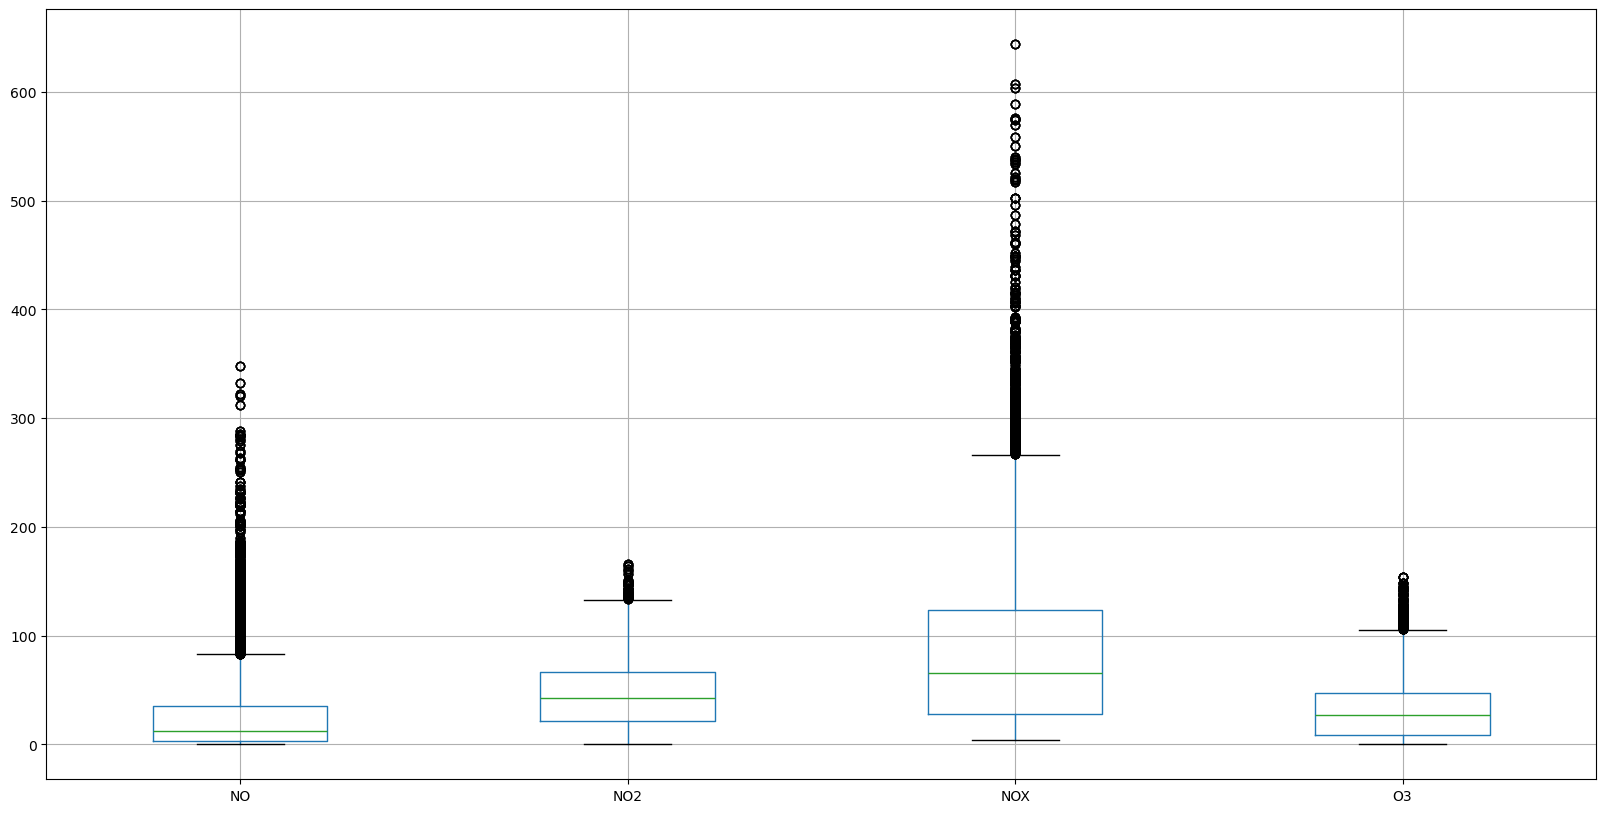

In [142]:
%matplotlib inline
data4 = data.pivot_table(values='Value', index=data.index, columns='Species', aggfunc='first')
data4['NO'] = pd.to_numeric(data4['NO'])

print(data4)
print(data4.describe())

data4.boxplot(figsize=(20,10))

Based of these boxplots we can cleary that each Species contains several outliers. 

In [116]:
Z = (data4-data4.mean())/data4.std()
print(Z)
#print(Z.describe())
Z.to_csv('z.csv', index=False)

Species        NO  NO2  NOX        O3
35040   -0.527222  NaN  NaN       NaN
35041   -0.527222  NaN  NaN       NaN
35042   -0.527222  NaN  NaN       NaN
35043   -0.527222  NaN  NaN       NaN
35044   -0.579590  NaN  NaN       NaN
...           ...  ...  ...       ...
175195        NaN  NaN  NaN  0.997306
175196        NaN  NaN  NaN  1.156457
175197        NaN  NaN  NaN  1.156457
175198        NaN  NaN  NaN  1.156457
175199        NaN  NaN  NaN  1.156457

[131724 rows x 4 columns]


Using the describe function to see the values of Z we can tell that our values are too low.\
This will discard every datapoint we have when using a Z score between -3 and 3

In [141]:
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
    
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4),:]
print('Number of rows after discarding missing vlaues = %d' % (Z2.shape[0]))


print('\nLenght before removing outliers in NO: {}'.format(len(data4)))
remove_outliers(data4, 'NO', 2)
print('Length after removing outliers in NO : {}'.format(len(data4)))


Number of rows before discarding outliers = 131724
Number of rows after discarding missing vlaues = 0

Lenght before removing outliers in NO: 112236
Length after removing outliers in NO : 111740


The spread of the data had values that were too small to fit between Z scores of -3 and 3.\
I resorted to removing outliers in the column of 'NO'.\
Using the function 'remove_outliers' for tensorflow/Tutorial, I removed any outliers in column 'NO' that had a value beyond the SD


# Duplicates/Dropping Fields

In [115]:
dups = data.duplicated()
print('Number of duplicated rows = %d' % (dups.sum()))
data.loc[[45044,45045]]

Number of duplicated rows = 0


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
45044,NO,15/04/2018 05:00,53.9,ug m-3,R
45045,NO,15/04/2018 05:15,53.9,ug m-3,R


The instances in this data set seems to not have any duplicates but that is due to the time intervales. If we drop the 'ReadingDateTime' we can truely see how many duplicated instances there are. 

In [116]:
data2 = data.drop(['ReadingDateTime'], axis=1)

dups2 = data2.duplicated()
print('Number of duplicated rows: %d' % (dups2.sum()))
data2.tail()


Number of duplicated rows: 169262


,Species,Value,Units,Provisional or Ratified
175195,O3,57.0,ug m-3,R
175196,O3,61.1,ug m-3,R
175197,O3,61.1,ug m-3,R
175198,O3,61.1,ug m-3,R
175199,O3,61.1,ug m-3,R


In [117]:
print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
noDups = data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (noDups.shape[0]))


Number of rows before discarding duplicates = 175200
Number of rows after discarding duplicates = 5938


## Create a dataframe by reading a CSV file


In [2]:
import os
import numpy as np
import pandas as pd

path= ""
filename_read = os.path.join(path, "LaqnData.csv")
df = pd.read_csv(filename_read, na_values=['Nan', '?'])
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


## Shuffle the dataframe
It is also possible to shuffle the data in the dataframe.

In [3]:
df = df.reindex(np.random.permutation(df.index))
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
156784,HI0,O3,23/06/2018 04:00,9.40000,ug m-3,R
142768,HI0,O3,28/01/2018 04:00,45.40000,ug m-3,R
447,HI0,CO,05/01/2018 15:45,NaN,mg m-3,P
5065,HI0,CO,22/02/2018 18:15,NaN,mg m-3,P
150728,HI0,O3,21/04/2018 02:00,37.30000,ug m-3,R
...,...,...,...,...,...,...
19489,HI0,CO,23/07/2018 00:15,NaN,mg m-3,P
101923,HI0,NO2,28/11/2018 16:45,50.50000,ug m-3,R
151372,HI0,O3,27/04/2018 19:00,7.60000,ug m-3,R
40907,HI0,NO,03/03/2018 02:45,4.40000,ug m-3,R


It is also possible to shuffle the data and reordering the indexes starting from 0 using 'reset_index'

In [4]:
df.reset_index(inplace=True, drop=True)
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,O3,23/06/2018 04:00,9.40000,ug m-3,R
1,HI0,O3,28/01/2018 04:00,45.40000,ug m-3,R
2,HI0,CO,05/01/2018 15:45,NaN,mg m-3,P
3,HI0,CO,22/02/2018 18:15,NaN,mg m-3,P
4,HI0,O3,21/04/2018 02:00,37.30000,ug m-3,R
...,...,...,...,...,...,...
175195,HI0,CO,23/07/2018 00:15,NaN,mg m-3,P
175196,HI0,NO2,28/11/2018 16:45,50.50000,ug m-3,R
175197,HI0,O3,27/04/2018 19:00,7.60000,ug m-3,R
175198,HI0,NO,03/03/2018 02:45,4.40000,ug m-3,R


## Sorting Dataframes
We are also able to sort dataframes by a certain descriptor. In this example, let's sort by the value from least to greatest, then save the file.

In [5]:
import os
import pandas as pd
import numpy as np
path =""
filename_read = os.path.join(path, "LaqnData.csv")
df = pd.read_csv(filename_read, na_values=['Nan', '?'])
df = df.sort_values(by='Value',ascending=True)
df




,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
41864,HI0,NO,13/03/2018 02:00,0.0,ug m-3,R
57599,HI0,NO,23/08/2018 23:45,0.0,ug m-3,R
40512,HI0,NO,27/02/2018 00:00,0.0,ug m-3,R
40513,HI0,NO,27/02/2018 00:15,0.0,ug m-3,R
40514,HI0,NO,27/02/2018 00:30,0.0,ug m-3,R
...,...,...,...,...,...,...
174203,HI0,O3,21/12/2018 14:45,NaN,ug m-3,R
174204,HI0,O3,21/12/2018 15:00,NaN,ug m-3,R
174205,HI0,O3,21/12/2018 15:15,NaN,ug m-3,R
174206,HI0,O3,21/12/2018 15:30,NaN,ug m-3,R


Now the data is sorted by the value, in ascending order. We are also able to extract certain data from a specific index value:

In [6]:
print("The Value of the 50th entry is: {}".format(df['Value'].iloc[49]))

The Value of the 50th entry is: 0.1


We are able to use 'iloc' and 'loc' to gather any value at a specific index.
Now let's save the data to a new CSV File:

In [8]:
filename_write = os.path.join(path, "LagnData_shuffled.csv")
df.to_csv(filename_write, index=False)
print("Saved file: {}".format(filename_write))

Saved file: LagnData_shuffled.csv


## Feature Normalization
In order to more easily compare values, we utilize feature normalization.

In [6]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

data = pd.read_csv('LaqnData.csv')
data = data.dropna()

data['Value']

0         2.5
1         1.9
2         1.8
3         0.9
4         0.9
         ... 
43795    11.2
43796    11.5
43797    11.8
43798    11.3
43799    13.8
Name: Value, Length: 36287, dtype: float64

A type of feature normalization used is the z-score, as seen below. If Nans are not dropped, then after amending the table with the z-scores, the full Value column will be corrupted and format to NaNs.

In [7]:
data['Value'] = zscore(data['Value'])
data['Value']

0       -0.987695
1       -1.010757
2       -1.014600
3       -1.049193
4       -1.049193
           ...   
43795   -0.653301
43796   -0.641770
43797   -0.630239
43798   -0.649457
43799   -0.553367
Name: Value, Length: 36287, dtype: float64

## Calculated Fields
Creating and/or replacing previous column values with a correspondent value - such as replacing weight in pounds with weight in kilograms. Here, we will integrate the z-score created previously into the dataset as its own column.

In [15]:
#df.insert(1,'weight_kg',(df['weight']*0.45359237).astype(int))
data = pd.read_csv('LaqnData.csv')
data = data.dropna()
data['Value'] = zscore(data['Value'])
dataZ = data['Value']
data = pd.read_csv('LaqnData.csv')
data.insert(4, 'z_score',dataZ)
data

,Site,Species,ReadingDateTime,Value,z_score,Units,Provisional or Ratified
0,BL0,NO,01/01/2018 00:00,2.5,-0.987695,ug m-3,R
1,BL0,NO,01/01/2018 01:00,1.9,-1.010757,ug m-3,R
2,BL0,NO,01/01/2018 02:00,1.8,-1.014600,ug m-3,R
3,BL0,NO,01/01/2018 03:00,0.9,-1.049193,ug m-3,R
4,BL0,NO,01/01/2018 04:00,0.9,-1.049193,ug m-3,R
...,...,...,...,...,...,...,...
43795,BL0,PM10,31/12/2018 19:00,11.2,-0.653301,ug/m3,P
43796,BL0,PM10,31/12/2018 20:00,11.5,-0.641770,ug/m3,P
43797,BL0,PM10,31/12/2018 21:00,11.8,-0.630239,ug/m3,P
43798,BL0,PM10,31/12/2018 22:00,11.3,-0.649457,ug/m3,P


# Importing Dataset

Example of data shown

Dataset is daily min temps throughout the months

As shown below we are using pandas library to convert the date to datetime format

In [53]:
import pandas as pd
import numpy as np
import os

data=pd.read_csv("Daily_Min_Temp.csv")
data.index = pd.to_datetime(data['Date'])
data = data.drop(['Date'], axis=1)
print(data)

            Temp
Date            
1990-05-22   4.5
1990-05-23   7.2
1990-05-24  10.0
1990-05-25  10.5
1990-05-26  10.7
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[224 rows x 1 columns]


Text(0, 0.5, 'Temperature (F)')

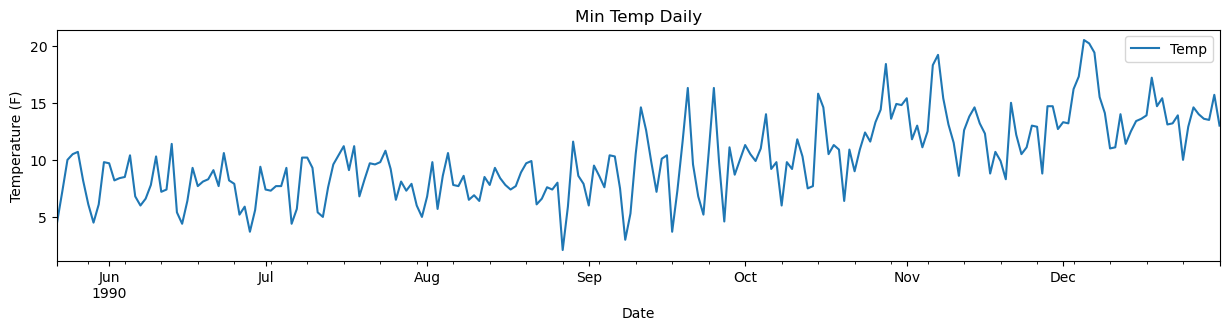

In [70]:
ax = data.plot(kind='line', figsize=(15, 3))
ax.set_title("Min Temp Daily")
ax.set_ylabel("Temperature (F)")

As shown above in the graph there is a lot of information shown and it is not clear on what the temp is on each day, this is where aggregation will come into play

# Aggregation

Using aggregation to combine all of the days and calculating the mean of each month there is less data but the quality of the data is higher. The min temps are grouped and aggregated by month.

Text(0, 0.5, 'Temperature (F)')

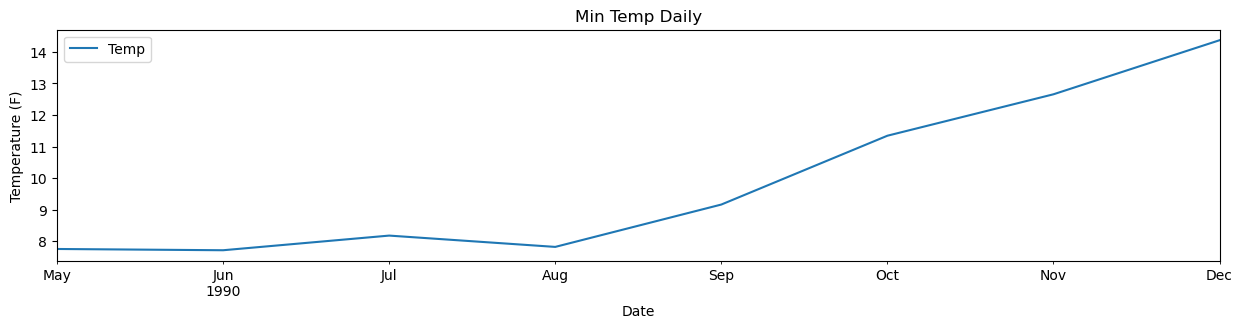

In [66]:
monthly = data.groupby(pd.Grouper(freq='M')).mean()
ax = monthly.plot(kind='line', figsize=(15, 3))
ax.set_title("Min Temp Daily")
ax.set_ylabel("Temperature (F)")


As shown above the graph is much smoother than the previous graph where none of the data was aggregated.

# Sampling

Using another dataset, this dataset has many entries as shown below which is too expensive or time consuming for data miners.

In [71]:
data2 = pd.read_csv("LaqnData.csv")
print(data2)

       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0       HI0      CO  01/01/2018 00:00    NaN  mg m-3                       P
1       HI0      CO  01/01/2018 00:15    NaN  mg m-3                       P
2       HI0      CO  01/01/2018 00:30    NaN  mg m-3                       P
3       HI0      CO  01/01/2018 00:45    NaN  mg m-3                       P
4       HI0      CO  01/01/2018 01:00    NaN  mg m-3                       P
...     ...     ...               ...    ...     ...                     ...
175195  HI0      O3  31/12/2018 22:45   57.0  ug m-3                       R
175196  HI0      O3  31/12/2018 23:00   61.1  ug m-3                       R
175197  HI0      O3  31/12/2018 23:15   61.1  ug m-3                       R
175198  HI0      O3  31/12/2018 23:30   61.1  ug m-3                       R
175199  HI0      O3  31/12/2018 23:45   61.1  ug m-3                       R

[175200 rows x 6 columns]


In [75]:
sample = data2.sample(n=10)
sample

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
47480,HI0,NO,10/05/2018 14:00,4.6,ug m-3,R
91163,HI0,NO2,08/08/2018 14:45,63.2,ug m-3,R
154619,HI0,O3,31/05/2018 14:45,58.3,ug m-3,R
20077,HI0,CO,29/07/2018 03:15,NaN,mg m-3,P
131697,HI0,NOX,04/10/2018 20:15,94.9,ug m-3 as NO2,R
139606,HI0,NOX,26/12/2018 05:30,NaN,ug m-3 as NO2,R
165423,HI0,O3,21/09/2018 03:45,34.4,ug m-3,R
118717,HI0,NOX,22/05/2018 15:15,11.4,ug m-3 as NO2,R
115392,HI0,NOX,18/04/2018 00:00,88.4,ug m-3 as NO2,R
50245,HI0,NO,08/06/2018 09:15,4.0,ug m-3,R


Using sampling we can randomly select as many data as we want too analyze it rather than going through everything.

 # Concatenating Rows and Columns

In [29]:
import pandas as pd
import os
import numpy as np
from scipy.stats import zscore
data = pd.read_csv('C:\\Users\\SJ\\Downloads\\LaqnData.csv')

path = ""
filename_read = os.path.join(path,"LaqnData.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
col_Site = df['Site']
col_Species = df['Species']
col_ReadingDateTime = df['ReadingDateTime']
col_Value = df['Value']
col_Units = df['Units']
col_Provisional_or_Ratified = df['Provisional or Ratified']


df


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


In [28]:
# Create a new dataframe from name and horsepower, but this time by row

import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
data = pd.read_csv('C:\\Users\\SJ\\Downloads\\LaqnData.csv')

path = ""

filename_read = os.path.join(path,"LaqnData.csv") 
df = pd.read_csv(filename_read,na_values=['NA','?'])
col_Site = df['Site']
col_Species = df['Species']
col_ReadingDateTime = df['ReadingDateTime']
col_Value = df['Value']
col_Units = df['Units']
col_Provisional_or_Ratified = df['Provisional or Ratified']
result = pd.concat([col_Site,col_Species,col_ReadingDateTime,col_Value,col_Units,col_Provisional_or_Ratified])
result

0         HI0
1         HI0
2         HI0
3         HI0
4         HI0
         ... 
175195      R
175196      R
175197      R
175198      R
175199      R
Length: 1051200, dtype: object

# Discretization

Value
7.1      136
5.1      224
3.6      272
2.9      304
2.7      352
        ... 
222.0      4
201.5      4
160.8      4
122.2      4
110.8      4
Name: count, Length: 2526, dtype: int64


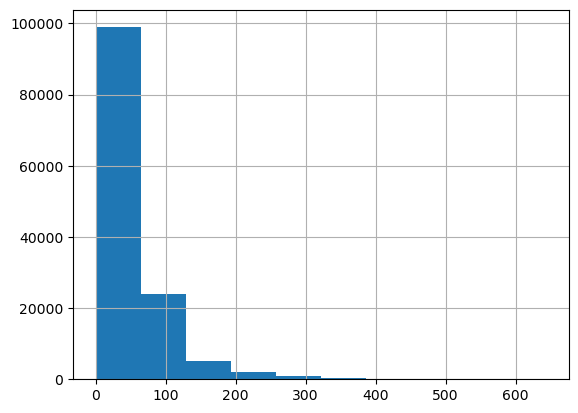

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\chueu\\Downloads\\LaqnData.csv')

# Plot a histogram for the 'Value' column
data['Value'].hist(bins=10)

# Print value counts for the 'Value' column, without sorting
print(data['Value'].value_counts(sort=False))


For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

**<font color="red">Code:</font>**

In [13]:
bins = pd.cut(data['Value'], 4)
bins.value_counts(sort=False)

Value
(-0.644, 160.975]    126196
(160.975, 321.95]      4884
(321.95, 482.925]       548
(482.925, 643.9]         96
Name: count, dtype: int64

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

**<font color="red">Code:</font>**

In [14]:
bins = pd.qcut(data['Value'],4)
bins.value_counts(sort=False)

Value
(-0.001, 12.5]    33048
(12.5, 33.2]      32916
(33.2, 64.2]      32868
(64.2, 643.9]     32892
Name: count, dtype: int64

## Training and Test Split

In [3]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split

df = pd.read_csv('LaqnData.csv')
df[0:5]


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BL0,NO,01/01/2018 00:00,2.5,ug m-3,R
1,BL0,NO,01/01/2018 01:00,1.9,ug m-3,R
2,BL0,NO,01/01/2018 02:00,1.8,ug m-3,R
3,BL0,NO,01/01/2018 03:00,0.9,ug m-3,R
4,BL0,NO,01/01/2018 04:00,0.9,ug m-3,R


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = preprocessing.LabelEncoder()
df['encoded_species'] = le.fit_transform(df['Species'])
df[0:5]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,encoded_species
0,BL0,NO,01/01/2018 00:00,2.5,ug m-3,R,0
1,BL0,NO,01/01/2018 01:00,1.9,ug m-3,R,0
2,BL0,NO,01/01/2018 02:00,1.8,ug m-3,R,0
3,BL0,NO,01/01/2018 03:00,0.9,ug m-3,R,0
4,BL0,NO,01/01/2018 04:00,0.9,ug m-3,R,0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df[['Site', 'Species', 'ReadingDateTime', 'Value']], df['encoded_species'], test_size=0.25, random_state=42)
df[0:5]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,encoded_species
0,BL0,NO,01/01/2018 00:00,2.5,ug m-3,R,0
1,BL0,NO,01/01/2018 01:00,1.9,ug m-3,R,0
2,BL0,NO,01/01/2018 02:00,1.8,ug m-3,R,0
3,BL0,NO,01/01/2018 03:00,0.9,ug m-3,R,0
4,BL0,NO,01/01/2018 04:00,0.9,ug m-3,R,0


In [11]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,encoded_species
0,BL0,NO,01/01/2018 00:00,2.5,ug m-3,R,0
1,BL0,NO,01/01/2018 01:00,1.9,ug m-3,R,0
2,BL0,NO,01/01/2018 02:00,1.8,ug m-3,R,0
3,BL0,NO,01/01/2018 03:00,0.9,ug m-3,R,0
4,BL0,NO,01/01/2018 04:00,0.9,ug m-3,R,0
...,...,...,...,...,...,...,...
43795,BL0,PM10,31/12/2018 19:00,11.2,ug/m3,P,4
43796,BL0,PM10,31/12/2018 20:00,11.5,ug/m3,P,4
43797,BL0,PM10,31/12/2018 21:00,11.8,ug/m3,P,4
43798,BL0,PM10,31/12/2018 22:00,11.3,ug/m3,P,4
